# Exercício 3 - MLP

Pedro Buczinski: 12555266 \\
César Lima: 12703142

Inclusão das Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

Declaracao da função de ativação dos neurônios

In [ ]:
#sigmoid function
def sigmoid(X):
   return 1/(1+np.exp(-X))

# Primeira Função

Criação dos dados de treinamento - Entre 1000 e 10000

In [ ]:
Nt = 5500
dominio = np.linspace(1, 100, Nt, endpoint=True)
x_1 = dominio.reshape(Nt, 1)
function_1 = lambda x : 1/x
d_1 = function_1(dominio)
d_1 = d_1.reshape(Nt, 1)
print(d_1.shape)

(5500, 1)


Criação da função de treinamento da rede neural

In [ ]:
def redeMLP_21(x, d, eta, Nt, Nb, Ne, N, W01_2):
    """
    J_MSE, W1_1, W2_1, W1_2 = redeMLP(x, d, Nn, eta, Nt, Nb, Ne, W0)
    Saídas:
    J_MSE: valor da função custo ao longo das épocas
    W1_1: vetor de pesos do neurônio 1 da camada 1
    W2_1: vetor de pesos do neurônio 2 da camada 1
    W1_2: vetor de pesos do neurônio 1 da camada de saída
    Entradas:
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Nb: tamanho do mini-batch
    Ne: número de épocas
    N: numero de neuronios da camada oculta
    W01_2: vetor de pesos o neurônio 1 da camada de saída (útlima iteração, inclui o bias)
    """

    # número de mini-batches por época
    Nmb = int(np.floor(Nt / Nb))

    # inicialização dos pesos do neuronio 1 da camada de saida
    W1_2 = W01_2.copy()

    # passo de adaptação dividido pelo tamanho do mini-batch
    eta = eta / Nb

    # inicialização do vetor que contém o valor da função custo
    J_MSE = np.zeros((Ne, 1))

    # Juntamos o vetor de entrada com o sinal desejado e inserimos
    # uma coluna de uns para levar em conta o bias
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    # vetor de uns para o bias no mini-batch
    b = np.ones((Nb, 1))

    #Declaracao dos pesos de cada neuronio da camada oculta
    w = np.zeros((2, N))
    for i in range(N):
        w[:, i] = (0.02 * np.random.rand(2) - 0.01)

    #Inicializacao dos vetores v_s, y_s e dphi_s dos neuronios da camada oculta
    v = np.zeros((N, Nb))
    y = np.zeros((N, Nb))
    dphis = np.zeros((Nb, N))
    delta1_2 = np.zeros((Nb, 1))
    delta = np.zeros((N, Nb))

    # for das épocas
    for k in range(Ne):
      # Embaralha os dados
      np.random.shuffle(Xd)
      X = Xd[:, 0:2]
      d = Xd[:, [2]]

      for l in range(Nmb):
          # Mini-batch
          start = l * Nb
          end = (l + 1) * Nb
          X1mb = X[start:end, :]
          dmb = d[start:end]

          # Forward Pass - Camada oculta
          v = X1mb @ w
          y = sigmoid(v)
          dphis = y * (1 - y)

          # Forward Pass - Saída
          X2mb = np.hstack((b, y))  # Inclui bias
          v1mb_2 = X2mb @ W1_2.T
          y1mb_2 = sigmoid(v1mb_2)
          dphi1_2 = y1mb_2 * (1 - y1mb_2)

          # Erro e delta da camada de saída
          e1mb_2 = dmb - y1mb_2
          delta1_2 = dphi1_2 * e1mb_2  # Nb x 1

          # Atualização dos pesos da camada de saída
          W1_2 += eta * delta1_2.T @ X2mb  # 1 x (N+1)

          # Cálculo dos deltas da camada oculta (vetorizado)
          delta_hidden = (delta1_2 @ W1_2[:, 1:]) * dphis  # Nb x N

          # Atualização dos pesos da camada oculta (vetorizado)
          w += X1mb.T @ (eta * delta_hidden)  # 2 x N

          # Atualiza erro quadrático médio acumulado
          J_MSE[k] += np.sum(e1mb_2 ** 2)

      # Cálculo final do MSE na época k
      J_MSE[k] /= (Nmb * Nb * 1)

      # Debug opcional
      #if k % 100 == 0:
          # print(f"Época: {k}, MSE: {J_MSE[k]}")


    return J_MSE, w, W1_2

Parâmetros de treinamento

In [ ]:
# Parâmetros da rede

# passo de adaptação do algoritmo backpropagation
eta = 0.9

# Tamanho do mini-batch
Nb = 11

# Número de épocas
Ne = 500

Numero de Neurônios da camada oculta e inicialização dos pesos da camada de saida

In [ ]:
#Número de Neuronios
N_3 = 3
N_4 = 4
N_5 = 5
N_10 = 10
N_15 = 15
N_20 = 20
N_50 = 50
N_100 = 100

# Inicialização doo peso da camada oculta
W01_2_3 = 0.02 * np.random.rand(1, N_3 + 1) - 0.01
W01_2_4 = 0.02 * np.random.rand(1, N_4 + 1) - 0.01
W01_2_5 = 0.02 * np.random.rand(1, N_5 + 1) - 0.01
W01_2_10 = 0.02 * np.random.rand(1, N_10 + 1) - 0.01
W01_2_15 = 0.02 * np.random.rand(1, N_15 + 1) - 0.01
W01_2_20 = 0.02 * np.random.rand(1, N_20 + 1) - 0.01
W01_2_50 = 0.02 * np.random.rand(1, N_50 + 1) - 0.01
W01_2_100 = 0.02 * np.random.rand(1, N_100 + 1) - 0.01

Treinamento do modelo para diversos números de neurônios

In [ ]:
(J_MSE_3_1, w_3, W1_2_3) = redeMLP_21(x_1, d_1, eta, Nt, Nb, Ne, N_3, W01_2_3)
(J_MSE_4_1, w_4, W1_2_4) = redeMLP_21(x_1, d_1, eta, Nt, Nb, Ne, N_4, W01_2_4)
(J_MSE_5_1, w_5, W1_2_5) = redeMLP_21(x_1, d_1, eta, Nt, Nb, Ne, N_5, W01_2_5)
(J_MSE_10_1, w_10, W1_2_10) = redeMLP_21(x_1, d_1, eta, Nt, Nb, Ne, N_10, W01_2_10)
(J_MSE_15_1, w_15, W1_2_15) = redeMLP_21(x_1, d_1, eta, Nt, Nb, Ne, N_15, W01_2_15)
(J_MSE_20_1, w_20, W1_2_20) = redeMLP_21(x_1, d_1, eta, Nt, Nb, Ne, N_20, W01_2_20)
(J_MSE_50_1, w_50, W1_2_50) = redeMLP_21(x_1, d_1, eta, Nt, Nb, Ne, N_50, W01_2_50)
(J_MSE_100_1, w_100, W1_2_100) = redeMLP_21(x_1, d_1, eta, Nt, Nb, Ne, N_100, W01_2_100)

Função para teste de uma rede neural com N neurônios na camada oculta

In [ ]:
def redeMLP_teste_21(x, d, w, W1_2, Nteste, N):

    # insere 1's por causa do bias
    x = np.hstack((np.ones((Nteste, 1)), x))
    J_MSE = np.zeros((Nteste, 1))
    y_oculta = np.zeros((Nteste, N))
    y = np.zeros((Nteste, 1))
    e = np.zeros((Nteste, 1))
    b = 1

    v = np.zeros((N, 1))
    X1 = np.zeros((1, 2))

    for n in range(Nteste):
        X1 = x[n, :]

        # cálculo progressivo com os pesos fixos da última época
        for i in range(N):
            v[i, :] = w[:, i] @ X1
            y_oculta[:, i] = sigmoid(v[i, :])

        X2 = np.hstack((b, y_oculta[n, :]))
        v1_2 = X2 @ W1_2.T
        y1_2 = sigmoid(v1_2)

        y[n, :] = y1_2
        e[n, :] = d[n, :] - y[n, :]
        J_MSE[n] = (J_MSE[n] + (np.linalg.norm(e[n, :])) ** 2) / (1)

    return J_MSE, y

Teste da rede neural treinada

In [ ]:
N_teste = 1000
dominio_teste = np.linspace(1, 100, N_teste)
x_teste = dominio_teste.reshape(-1, 1)
d_teste = function_1(dominio_teste)
d_teste = d_teste.reshape(N_teste, 1)

Teste dos diversos modelos

In [ ]:
(J_MSEteste_3_1, yteste_3_1) = redeMLP_teste_21(x_teste, d_teste, w_3, W1_2_3, N_teste, N_3)
(J_MSEteste_4_1, yteste_4_1) = redeMLP_teste_21(x_teste, d_teste, w_4, W1_2_4, N_teste, N_4)
(J_MSEteste_5_1, yteste_5_1) = redeMLP_teste_21(x_teste, d_teste, w_5, W1_2_5, N_teste, N_5)
(J_MSEteste_10_1, yteste_10_1) = redeMLP_teste_21(x_teste, d_teste, w_10, W1_2_10, N_teste, N_10)
(J_MSEteste_15_1, yteste_15_1) = redeMLP_teste_21(x_teste, d_teste, w_15, W1_2_15, N_teste, N_15)
(J_MSEteste_20_1, yteste_20_1) = redeMLP_teste_21(x_teste, d_teste, w_20, W1_2_20, N_teste, N_20)
(J_MSEteste_50_1, yteste_50_1) = redeMLP_teste_21(x_teste, d_teste, w_50, W1_2_50, N_teste, N_50)
(J_MSEteste_100_1, yteste_100_1) = redeMLP_teste_21(x_teste, d_teste, w_100, W1_2_100, N_teste, N_100)

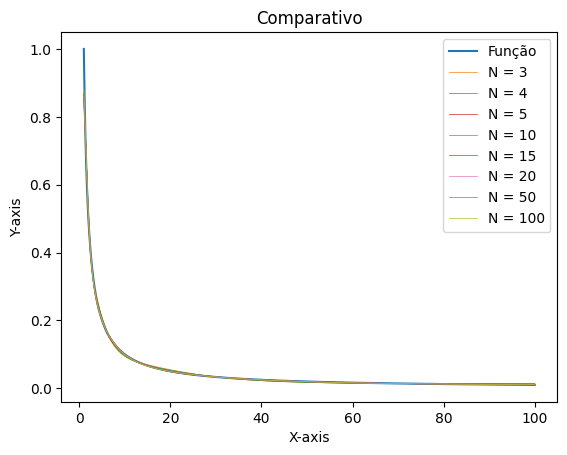

In [ ]:
# Plot both sets of data on the same graphic
plt.plot(dominio_teste, d_teste, label='Função')
plt.plot(dominio_teste, yteste_3_1, label='N = 3', linewidth = 0.5)
plt.plot(dominio_teste, yteste_4_1, label='N = 4', linewidth = 0.5)
plt.plot(dominio_teste, yteste_5_1, label='N = 5', linewidth = 0.5)
plt.plot(dominio_teste, yteste_10_1, label='N = 10', linewidth = 0.5)
plt.plot(dominio_teste, yteste_15_1, label='N = 15', linewidth = 0.5)
plt.plot(dominio_teste, yteste_20_1, label='N = 20', linewidth = 0.5)
plt.plot(dominio_teste, yteste_50_1, label='N = 50', linewidth = 0.5)
plt.plot(dominio_teste, yteste_100_1, label='N = 100', linewidth = 0.5)

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparativo')
plt.legend()

# Show the plot
plt.show()

# Segunda Função

In [ ]:
Nt = 5500
dominio = np.linspace(1, 10, Nt, endpoint=True)
x_2 = dominio.reshape(Nt, 1)
function_2 = lambda x : np.log10(x)
d_2 = function_2(dominio)
d_2 = d_2.reshape(Nt, 1)
print(d_2.shape)

(5500, 1)


In [ ]:
# Parâmetros da rede

# passo de adaptação do algoritmo backpropagation
eta = 0.9

# Tamanho do mini-batch
Nb = 11

# Número de épocas
Ne = 500

In [ ]:
# Inicialização doo peso da camada oculta
W01_2_3 = 0.02 * np.random.rand(1, N_3 + 1) - 0.01
W01_2_4 = 0.02 * np.random.rand(1, N_4 + 1) - 0.01
W01_2_5 = 0.02 * np.random.rand(1, N_5 + 1) - 0.01
W01_2_10 = 0.02 * np.random.rand(1, N_10 + 1) - 0.01
W01_2_15 = 0.02 * np.random.rand(1, N_15 + 1) - 0.01
W01_2_20 = 0.02 * np.random.rand(1, N_20 + 1) - 0.01
W01_2_50 = 0.02 * np.random.rand(1, N_50 + 1) - 0.01
W01_2_100 = 0.02 * np.random.rand(1, N_100 + 1) - 0.01

In [ ]:
(J_MSE_3_2, w_3, W1_2_3) = redeMLP_21(x_2, d_2, eta, Nt, Nb, Ne, N_3, W01_2_3)
(J_MSE_4_2, w_4, W1_2_4) = redeMLP_21(x_2, d_2, eta, Nt, Nb, Ne, N_4, W01_2_4)
(J_MSE_5_2, w_5, W1_2_5) = redeMLP_21(x_2, d_2, eta, Nt, Nb, Ne, N_5, W01_2_5)
(J_MSE_10_2, w_10, W1_2_10) = redeMLP_21(x_2, d_2, eta, Nt, Nb, Ne, N_10, W01_2_10)
(J_MSE_15_2, w_15, W1_2_15) = redeMLP_21(x_2, d_2, eta, Nt, Nb, Ne, N_15, W01_2_15)
(J_MSE_20_2, w_20, W1_2_20) = redeMLP_21(x_2, d_2, eta, Nt, Nb, Ne, N_20, W01_2_20)
(J_MSE_50_2, w_50, W1_2_50) = redeMLP_21(x_2, d_2, eta, Nt, Nb, Ne, N_50, W01_2_50)
(J_MSE_100_2, w_100, W1_2_100) = redeMLP_21(x_2, d_2, eta, Nt, Nb, Ne, N_100, W01_2_100)

In [ ]:
N_teste = 1000
dominio_teste = np.linspace(1, 10, N_teste)
x_teste = dominio_teste.reshape(-1, 1)
d_teste = function_2(dominio_teste)
d_teste = d_teste.reshape(N_teste, 1)

In [ ]:
(J_MSEteste_3_2, yteste_3_2) = redeMLP_teste_21(x_teste, d_teste, w_3, W1_2_3, N_teste, N_3)
(J_MSEteste_4_2, yteste_4_2) = redeMLP_teste_21(x_teste, d_teste, w_4, W1_2_4, N_teste, N_4)
(J_MSEteste_5_2, yteste_5_2) = redeMLP_teste_21(x_teste, d_teste, w_5, W1_2_5, N_teste, N_5)
(J_MSEteste_10_2, yteste_10_2) = redeMLP_teste_21(x_teste, d_teste, w_10, W1_2_10, N_teste, N_10)
(J_MSEteste_15_2, yteste_15_2) = redeMLP_teste_21(x_teste, d_teste, w_15, W1_2_15, N_teste, N_15)
(J_MSEteste_20_2, yteste_20_2) = redeMLP_teste_21(x_teste, d_teste, w_20, W1_2_20, N_teste, N_20)
(J_MSEteste_50_2, yteste_50_2) = redeMLP_teste_21(x_teste, d_teste, w_50, W1_2_50, N_teste, N_50)
(J_MSEteste_100_2, yteste_100_2) = redeMLP_teste_21(x_teste, d_teste, w_100, W1_2_100, N_teste, N_100)

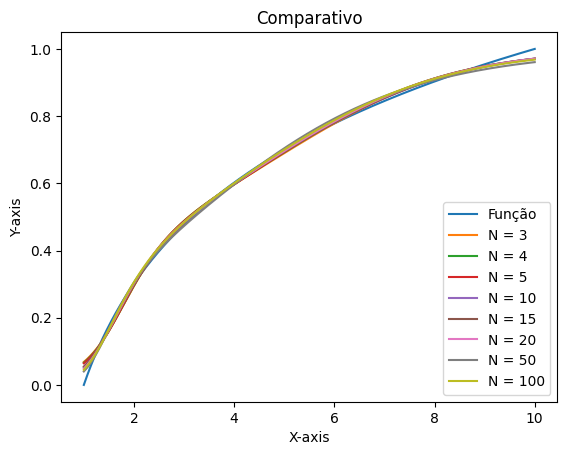

In [ ]:
# Plot both sets of data on the same graphic
plt.plot(dominio_teste, d_teste, label='Função')
plt.plot(dominio_teste, yteste_3_2, label='N = 3')
plt.plot(dominio_teste, yteste_4_2, label='N = 4')
plt.plot(dominio_teste, yteste_5_2, label='N = 5')
plt.plot(dominio_teste, yteste_10_2, label='N = 10')
plt.plot(dominio_teste, yteste_15_2, label='N = 15')
plt.plot(dominio_teste, yteste_20_2, label='N = 20')
plt.plot(dominio_teste, yteste_50_2, label='N = 50')
plt.plot(dominio_teste, yteste_100_2, label='N = 100')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparativo')
plt.legend()

# Show the plot
plt.show()

# Terceira Função

In [ ]:
Nt = 5500
dominio = np.linspace(1, 10, Nt, endpoint=True)
x_3 = dominio.reshape(Nt, 1)
function_3 = lambda x : np.exp(-x)
d_3 = function_3(dominio)
d_3 = d_3.reshape(Nt, 1)
print(d_3.shape)

(5500, 1)


In [ ]:
# Parâmetros da rede

# passo de adaptação do algoritmo backpropagation
eta = 0.9

# Tamanho do mini-batch
Nb = 11

# Número de épocas
Ne = 500

In [ ]:
# Inicialização doo peso da camada oculta
W01_2_3 = 0.02 * np.random.rand(1, N_3 + 1) - 0.01
W01_2_4 = 0.02 * np.random.rand(1, N_4 + 1) - 0.01
W01_2_5 = 0.02 * np.random.rand(1, N_5 + 1) - 0.01
W01_2_10 = 00.2 * np.random.rand(1, N_10 + 1) - 0.01
W01_2_15 = 0.02 * np.random.rand(1, N_15 + 1) - 0.01
W01_2_20 = 0.02 * np.random.rand(1, N_20 + 1) - 0.01
W01_2_50 = 0.02 * np.random.rand(1, N_50 + 1) - 0.01
W01_2_100 = 0.02 * np.random.rand(1, N_100 + 1) - 0.01

In [ ]:
(J_MSE_3_3, w_3, W1_2_3) = redeMLP_21(x_3, d_3, eta, Nt, Nb, Ne, N_3, W01_2_3)
(J_MSE_4_3, w_4, W1_2_4) = redeMLP_21(x_3, d_3, eta, Nt, Nb, Ne, N_4, W01_2_4)
(J_MSE_5_3, w_5, W1_2_5) = redeMLP_21(x_3, d_3, eta, Nt, Nb, Ne, N_5, W01_2_5)
(J_MSE_10_3, w_10, W1_2_10) = redeMLP_21(x_3, d_3, eta, Nt, Nb, Ne, N_10, W01_2_10)
(J_MSE_15_3, w_15, W1_2_15) = redeMLP_21(x_3, d_3, eta, Nt, Nb, Ne, N_15, W01_2_15)
(J_MSE_20_3, w_20, W1_2_20) = redeMLP_21(x_3, d_3, eta, Nt, Nb, Ne, N_20, W01_2_20)
(J_MSE_50_3, w_50, W1_2_50) = redeMLP_21(x_3, d_3, eta, Nt, Nb, Ne, N_50, W01_2_50)
(J_MSE_100_3, w_100, W1_2_100) = redeMLP_21(x_3, d_3, eta, Nt, Nb, Ne, N_100, W01_2_100)

In [ ]:
N_teste = 1000
dominio_teste = np.linspace(1, 10, N_teste)
x_teste = dominio_teste.reshape(-1, 1)
d_teste = function_3(dominio_teste)
d_teste = d_teste.reshape(N_teste, 1)

In [ ]:
(J_MSEteste_3_3, yteste_3_3) = redeMLP_teste_21(x_teste, d_teste, w_3, W1_2_3, N_teste, N_3)
(J_MSEteste_4_3, yteste_4_3) = redeMLP_teste_21(x_teste, d_teste, w_4, W1_2_4, N_teste, N_4)
(J_MSEteste_5_3, yteste_5_3) = redeMLP_teste_21(x_teste, d_teste, w_5, W1_2_5, N_teste, N_5)
(J_MSEteste_10_3, yteste_10_3) = redeMLP_teste_21(x_teste, d_teste, w_10, W1_2_10, N_teste, N_10)
(J_MSEteste_15_3, yteste_15_3) = redeMLP_teste_21(x_teste, d_teste, w_15, W1_2_15, N_teste, N_15)
(J_MSEteste_20_3, yteste_20_3) = redeMLP_teste_21(x_teste, d_teste, w_20, W1_2_20, N_teste, N_20)
(J_MSEteste_50_3, yteste_50_3) = redeMLP_teste_21(x_teste, d_teste, w_50, W1_2_50, N_teste, N_50)
(J_MSEteste_100_3, yteste_100_3) = redeMLP_teste_21(x_teste, d_teste, w_100, W1_2_100, N_teste, N_100)

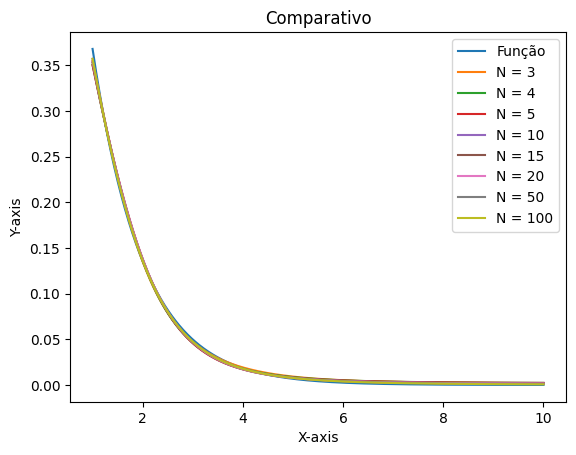

In [ ]:
# Plot both sets of data on the same graphic
plt.plot(dominio_teste, d_teste, label='Função')
plt.plot(dominio_teste, yteste_3_3, label='N = 3')
plt.plot(dominio_teste, yteste_4_3, label='N = 4')
plt.plot(dominio_teste, yteste_5_3, label='N = 5')
plt.plot(dominio_teste, yteste_10_3, label='N = 10')
plt.plot(dominio_teste, yteste_15_3, label='N = 15')
plt.plot(dominio_teste, yteste_20_3, label='N = 20')
plt.plot(dominio_teste, yteste_50_3, label='N = 50')
plt.plot(dominio_teste, yteste_100_3, label='N = 100')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparativo')
plt.legend()

# Show the plot
plt.show()

# Quarta Função

In [ ]:
Nt = 5500
dominio = np.linspace(0, np.pi/2, Nt, endpoint=True)
x_4 = dominio.reshape(Nt, 1)
function_4 = lambda x : np.sin(x)
d_4 = function_4(dominio)
d_4 = d_4.reshape(Nt, 1)
print(d_4.shape)

(5500, 1)


In [ ]:
# Parâmetros da rede

# passo de adaptação do algoritmo backpropagation
eta = 0.9

# Tamanho do mini-batch
Nb = 11

# Número de épocas
Ne = 500

In [ ]:
# Inicialização doo peso da camada oculta
W01_2_3 = 0.02 * np.random.rand(1, N_3 + 1) - 0.01
W01_2_4 = 0.02 * np.random.rand(1, N_4 + 1) - 0.01
W01_2_5 = 0.02 * np.random.rand(1, N_5 + 1) - 0.01
W01_2_10 = 0.02 * np.random.rand(1, N_10 + 1) - 0.01
W01_2_15 = 0.02 * np.random.rand(1, N_15 + 1) - 0.01
W01_2_20 = 0.02 * np.random.rand(1, N_20 + 1) - 0.01
W01_2_50 = 0.02 * np.random.rand(1, N_50 + 1) - 0.01
W01_2_100 = 0.02 * np.random.rand(1, N_100 + 1) - 0.01

In [ ]:
(J_MSE_3_4, w_3, W1_2_3) = redeMLP_21(x_4, d_4, eta, Nt, Nb, Ne, N_3, W01_2_3)
(J_MSE_4_4, w_4, W1_2_4) = redeMLP_21(x_4, d_4, eta, Nt, Nb, Ne, N_4, W01_2_4)
(J_MSE_5_4, w_5, W1_2_5) = redeMLP_21(x_4, d_4, eta, Nt, Nb, Ne, N_5, W01_2_5)
(J_MSE_10_4, w_10, W1_2_10) = redeMLP_21(x_4, d_4, eta, Nt, Nb, Ne, N_10, W01_2_10)
(J_MSE_15_4, w_15, W1_2_15) = redeMLP_21(x_4, d_4, eta, Nt, Nb, Ne, N_15, W01_2_15)
(J_MSE_20_4, w_20, W1_2_20) = redeMLP_21(x_4, d_4, eta, Nt, Nb, Ne, N_20, W01_2_20)
(J_MSE_50_4, w_50, W1_2_50) = redeMLP_21(x_4, d_4, eta, Nt, Nb, Ne, N_50, W01_2_50)
(J_MSE_100_4, w_100, W1_2_100) = redeMLP_21(x_4, d_4, eta, Nt, Nb, Ne, N_100, W01_2_100)

In [ ]:
N_teste = 1000
dominio_teste = np.linspace(0, np.pi/2, N_teste)
x_teste = dominio_teste.reshape(-1, 1)
d_teste = function_4(dominio_teste)
d_teste = d_teste.reshape(N_teste, 1)

In [ ]:
(J_MSEteste_3_4, yteste_3_4) = redeMLP_teste_21(x_teste, d_teste, w_3, W1_2_3, N_teste, N_3)
(J_MSEteste_4_4, yteste_4_4) = redeMLP_teste_21(x_teste, d_teste, w_4, W1_2_4, N_teste, N_4)
(J_MSEteste_5_4, yteste_5_4) = redeMLP_teste_21(x_teste, d_teste, w_5, W1_2_5, N_teste, N_5)
(J_MSEteste_10_4, yteste_10_4) = redeMLP_teste_21(x_teste, d_teste, w_10, W1_2_10, N_teste, N_10)
(J_MSEteste_15_4, yteste_15_4) = redeMLP_teste_21(x_teste, d_teste, w_15, W1_2_15, N_teste, N_15)
(J_MSEteste_20_4, yteste_20_4) = redeMLP_teste_21(x_teste, d_teste, w_20, W1_2_20, N_teste, N_20)
(J_MSEteste_50_4, yteste_50_4) = redeMLP_teste_21(x_teste, d_teste, w_50, W1_2_50, N_teste, N_50)
(J_MSEteste_100_4, yteste_100_4) = redeMLP_teste_21(x_teste, d_teste, w_100, W1_2_100, N_teste, N_100)

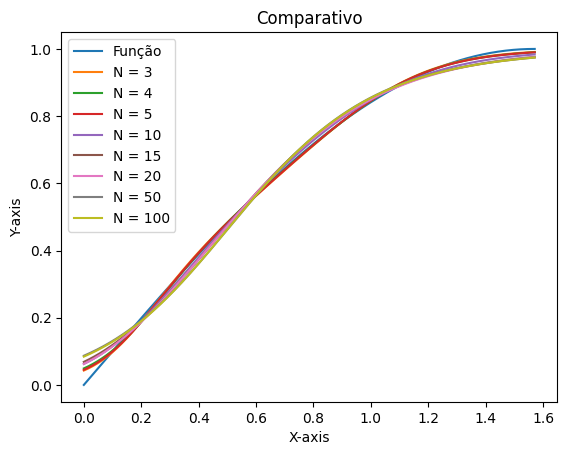

In [ ]:
# Plot both sets of data on the same graphic
plt.plot(dominio_teste, d_teste, label='Função')
plt.plot(dominio_teste, yteste_3_4, label='N = 3')
plt.plot(dominio_teste, yteste_4_4, label='N = 4')
plt.plot(dominio_teste, yteste_5_4, label='N = 5')
plt.plot(dominio_teste, yteste_10_4, label='N = 10')
plt.plot(dominio_teste, yteste_15_4, label='N = 15')
plt.plot(dominio_teste, yteste_20_4, label='N = 20')
plt.plot(dominio_teste, yteste_50_4, label='N = 50')
plt.plot(dominio_teste, yteste_100_4, label='N = 100')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparativo')
plt.legend()

# Show the plot
plt.show()

# Comparativo Completo

In [ ]:
# Criando um dicionário com os dados
data = {
    'Função': ['f(x) = 1/x', 'f(x) = 1/x', 'f(x) = 1/x', 'f(x) = 1/x', 'f(x) = 1/x', 'f(x) = 1/x', 'f(x) = 1/x', 'f(x) = 1/x',
               'f(x) = log10(x)', 'f(x) = log10(x)', 'f(x) = log10(x)', 'f(x) = log10(x)', 'f(x) = log10(x)', 'f(x) = log10(x)', 'f(x) = log10(x)', 'f(x) = log10(x)',
               'f(x) = e^(-x)', 'f(x) = e^(-x)', 'f(x) = e^(-x)', 'f(x) = e^(-x)', 'f(x) = e^(-x)', 'f(x) = e^(-x)', 'f(x) = e^(-x)', 'f(x) = e^(-x)',
               'f(x) = sen(x)', 'f(x) = sen(x)', 'f(x) = sen(x)', 'f(x) = sen(x)', 'f(x) = sen(x)', 'f(x) = sen(x)', 'f(x) = sen(x)', 'f(x) = sen(x)'],
    'N° de Neurônios na camada oculta': ['3', '4', '5', '10', '15', '20', '50', '100', '3', '4', '5', '10', '15', '20', '50', '100',
                                        '3', '4', '5', '10', '15', '20', '50', '100', '3', '4', '5', '10', '15', '20', '50', '100'],
    'Erro quadrático médio': [J_MSE_3_1[-1], J_MSE_4_1[-1], J_MSE_5_1[-1], J_MSE_10_1[-1], J_MSE_15_1[-1], J_MSE_20_1[-1], J_MSE_50_1[-1], J_MSE_100_1[-1],
                              J_MSE_3_2[-1], J_MSE_4_2[-1], J_MSE_5_2[-1], J_MSE_10_2[-1], J_MSE_15_2[-1], J_MSE_20_2[-1], J_MSE_50_2[-1], J_MSE_100_2[-1],
                              J_MSE_3_3[-1], J_MSE_4_3[-1], J_MSE_5_3[-1], J_MSE_10_3[-1], J_MSE_15_3[-1], J_MSE_20_3[-1], J_MSE_50_3[-1], J_MSE_100_3[-1],
                              J_MSE_3_4[-1], J_MSE_4_4[-1], J_MSE_5_4[-1], J_MSE_10_4[-1], J_MSE_15_4[-1], J_MSE_20_4[-1], J_MSE_50_4[-1], J_MSE_100_4[-1]]
}

# Criando um DataFrame com os dados
df = pd.DataFrame(data)

# Exibindo a tabela
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))

+-----------------+----------------------------------+-----------------------+
|     Função      | N° de Neurônios na camada oculta | Erro quadrático médio |
+-----------------+----------------------------------+-----------------------+
|   f(x) = 1/x    |                3                 |   [2.51287806e-05]    |
|   f(x) = 1/x    |                4                 |   [2.52595185e-05]    |
|   f(x) = 1/x    |                5                 |   [1.75207747e-05]    |
|   f(x) = 1/x    |                10                |   [2.51110752e-05]    |
|   f(x) = 1/x    |                15                |   [2.86884423e-05]    |
|   f(x) = 1/x    |                20                |    [3.0610526e-05]    |
|   f(x) = 1/x    |                50                |   [3.44750466e-05]    |
|   f(x) = 1/x    |               100                |   [1.45086608e-05]    |
| f(x) = log10(x) |                3                 |     [0.00014238]      |
| f(x) = log10(x) |                4                